## Exploratory Data Analysis - Churn Prediction Project

### Appel des librairies et du jeu de données

In [1]:
!pip install -r ../requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_parquet("../data/interim/data.parquet")

In [4]:
display(df.head())

,id_client,genre,espace_client_web,assurance_vie,banque_principale,anciennete_mois,compte_epargne,credit_autres,cartes_bancaires,compte_courant,...,segment_client,branche,churn,PC1,PC2,PC3,PC4,score_engagement,score_risque_financier,categorie_age
0,3463,H,False,False,False,37.0,True,consommation,medium,True,...,A4,NORD-OUEST,False,-1.465611,1.075251,-0.420699,-1.361621,34.77,77.39,25-34
1,1869,H,False,True,True,72.0,True,consommation,premium,None,...,B1,NORD-OUEST,False,2.202534,1.670018,-0.714063,0.734162,68.97,34.58,45-54
2,3760,H,False,False,False,3.0,True,permanent,medium,False,...,B2,NORD-OUEST,False,3.086645,-1.328881,0.406523,0.530878,25.00,74.63,35-44
3,3820,H,True,True,False,72.0,True,consommation,medium,True,...,C4,NORD-OUEST,False,-2.922917,-1.352179,-0.252189,-0.666896,86.21,38.80,35-44
4,1463,F,False,False,False,4.0,True,permanent,medium,False,...,B2,NORD-OUEST,True,-5.131980,1.491710,-1.470586,0.461202,18.39,90.30,25-34


### Statistiques

In [5]:
df.shape

(7035, 31)

In [6]:
df.describe()

,anciennete_mois,agios_6mois,interet_compte_epargne_total,age,PC1,PC2,PC3,PC4,score_engagement,score_risque_financier
count,7035.000000,7035.000000,7035.000000,7035.000000,7.035000e+03,7.035000e+03,7.035000e+03,7.035000e+03,7035.000000,7035.000000
mean,31.736318,63.767512,2232.133184,43.507747,4.848053e-17,-1.616018e-17,-2.070523e-17,2.777530e-17,47.398685,56.304986
std,24.689772,30.427946,2257.867773,16.049470,5.266812e+00,1.795401e+00,1.006858e+00,7.552392e-01,18.328417,15.981181
min,0.000000,18.250000,18.800000,20.000000,-1.135126e+01,-6.313559e+00,-4.333795e+00,-3.384291e+00,7.180000,0.000000
25%,8.000000,29.800000,353.850000,31.000000,-3.652501e+00,-1.173060e+00,-6.408242e-01,-4.779940e-01,32.470000,44.285000
50%,28.000000,69.950000,1346.900000,39.000000,-8.502473e-01,-4.602223e-02,4.735534e-03,-8.472194e-03,46.840000,57.090000
75%,55.000000,89.600000,3714.800000,54.000000,2.801280e+00,1.076400e+00,6.583904e-01,4.804594e-01,61.210000,68.010000
max,72.000000,118.650000,8496.700000,121.000000,4.350524e+01,9.412612e+00,4.720004e+00,4.986354e+00,100.000000,100.000000


In [7]:
df['churn'].value_counts(normalize=True)

churn
False    0.734471
True     0.265529
Name: proportion, dtype: float64

Informations démographiques

In [8]:
plt.style.use('ggplot')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

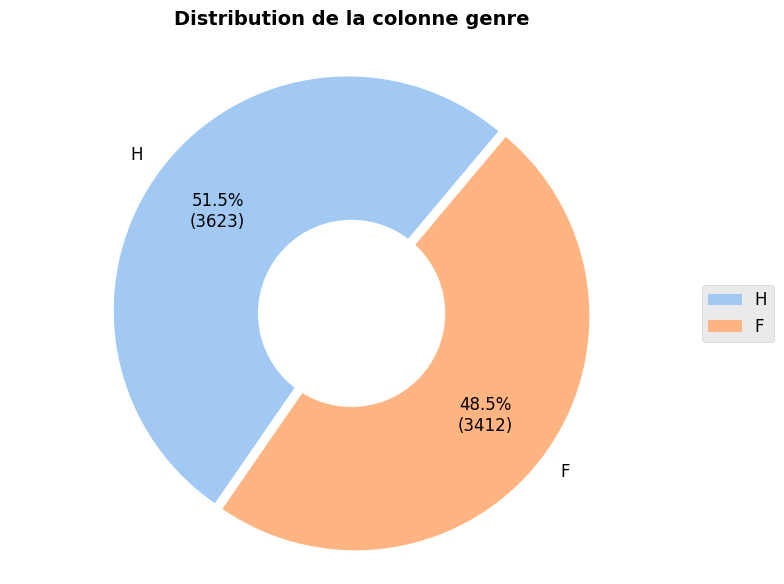

In [9]:
X = df['genre'].value_counts().sort_values(ascending=False)

colors = sns.color_palette("pastel", len(X))
fontsize = 12

plt.figure(figsize=(8, 6))

wedges, texts, autotexts = plt.pie(
    x=X, 
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(X))})',
    explode=[0.02] * len(X),
    colors=colors, 
    labels=X.index, 
    pctdistance=0.7,
    textprops={'fontsize': fontsize}, 
    startangle=50
)

plt.title('Distribution de la colonne genre', fontsize=fontsize+2, fontweight='bold', pad=20)

plt.gca().add_artist(plt.Circle((0, 0), 0.4, fc='white'))

for text in texts + autotexts:
    text.set_fontsize(fontsize)
plt.legend(wedges, X.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

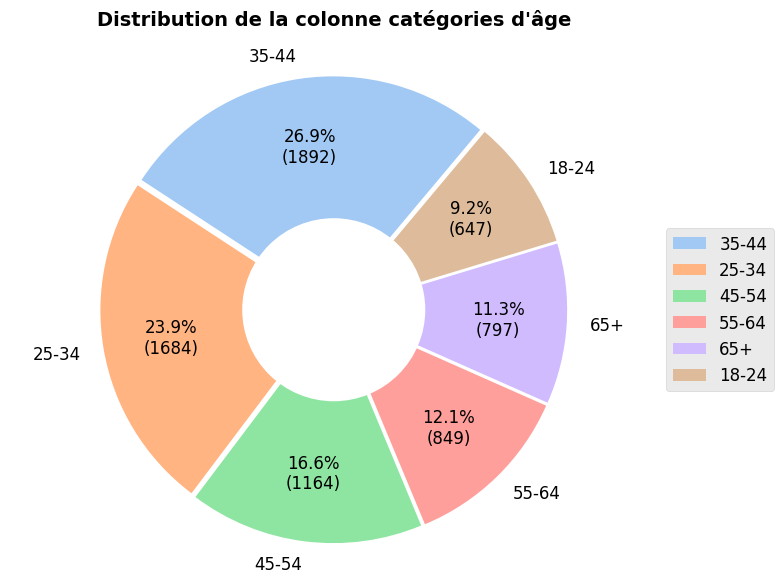

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

X = df['categorie_age'].value_counts().sort_values(ascending=False)

colors = sns.color_palette("pastel", len(X))
fontsize = 12

cond = X / X.sum() < 0.05
if cond.any():
    others_sum = X[cond].sum()
    X = X[~cond]
    if others_sum > 0:
        X['Others'] = others_sum

plt.figure(figsize=(8, 6))

wedges, texts, autotexts = plt.pie(
    x=X, 
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(X))})',
    explode=[0.02] * len(X),
    colors=colors[:len(X)], 
    labels=X.index, 
    pctdistance=0.7,
    textprops={'fontsize': fontsize}, 
    startangle=50
)

plt.title('Distribution de la colonne catégories d\'âge', fontsize=fontsize+2, fontweight='bold', pad=20)

plt.gca().add_artist(plt.Circle((0, 0), 0.4, fc='white'))

for text in texts + autotexts:
    text.set_fontsize(fontsize)

plt.legend(wedges, X.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.tight_layout()
plt.show()

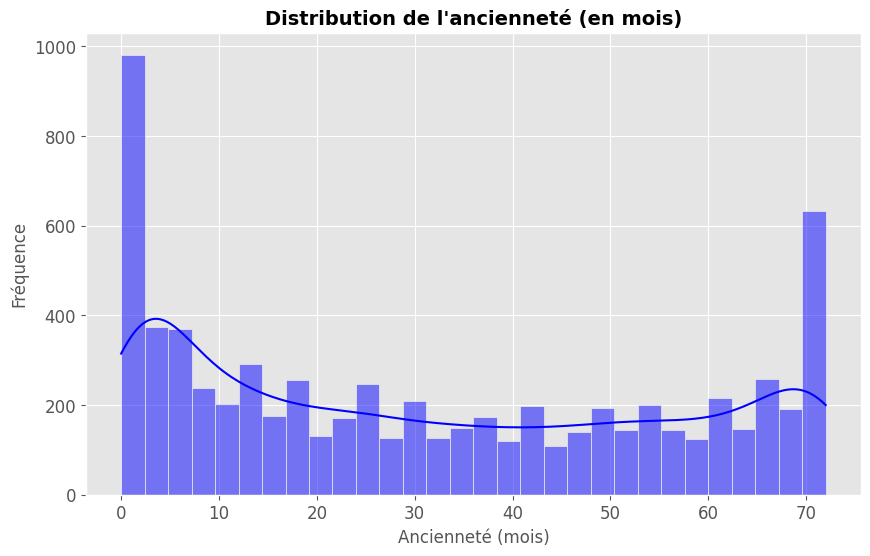

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['anciennete_mois'], bins=30, kde=True, color='blue')
plt.title('Distribution de l\'ancienneté (en mois)', fontsize=14, fontweight='bold')
plt.xlabel('Ancienneté (mois)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.show()